<a href="https://colab.research.google.com/github/Suvigya-bisht/git-github/blob/master/sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To fetch tweets from twitter, we need to install tweepy liberary.

In [3]:
!pip install tweepy

We'll import other liberaries that we need.

In [5]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


To use the 'tweepy' API, we need to create an account with Twitter Developer. After creating the account, on 'Get Started' option--navigate to the 'Create an app' option. After we create the app, we need to note down the below required credintials from there.

In [6]:
#Part-1: Authorization and Search tweets
#Getting authorization
consumer_key = 'p6Fg6WjZeOIQN1FvrsnvCfcbo'
consumer_key_secret = '7sgTYd66QCOoaEDuOXSoH5TkoTJrzmWvjEDnVdIaO7tqZgeGhg'
access_token = '132425188-3pEgCTglpzvYC605OMINgGkn3fO5pTFMv2NfWY61'
access_token_secret = 'Qkzccwwbf6J4Mrpkem4LHVefHxBT13E3C28x0F8gufIyc'
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

passing the keyword of interst here and maximum number of tweets to be downloaded through the tweepy API.

In [7]:
#Defining Search keyword and number of tweets and searching tweets
query = 'vaccination drive'
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

We will now analyze the sentiments of tweets that we have downloaded and visualize them

In [8]:
#Part-2: Sentiment Analysis Report

#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

Total Positive =  319
Total Negative =  142
Total Neutral =  539


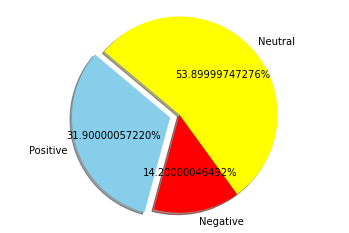

In [9]:
#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [319, 142, 539]
colors = ['skyblue', 'red', 'yellow']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.11f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

 we will create a dataframe of all the tweet data that we have downloaded. Later all the processed data will be saved to a CSV file in the local system. Through this way, we can utilize this tweet data for other experimental purpose.

In [11]:
#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data.csv')

As we are ready now with the tweet data set, we will analyze our dataset and clean this data in the following segments.

In [12]:
tweet_dataset.shape

(1000, 5)

In [13]:
tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1392057097378955266,RT @drthomasisaac: Kerala places order for 1 c...,0,576,Tue May 11 10:00:49 +0000 2021
1,1392057074880708611,RT @pseudo_sapiens: A private hospital is char...,0,51,Tue May 11 10:00:44 +0000 2021
2,1392057061152722944,RT @timesofindia: Jain temple is Mumbai’s firs...,0,45,Tue May 11 10:00:41 +0000 2021
3,1392056985755951109,"RT @IACAbhi: Being a Dilli wala myself, I'm Pr...",0,11,Tue May 11 10:00:23 +0000 2021
4,1392056964914499585,RT @Nawsagaray: An ideal vaccination drive is ...,0,3,Tue May 11 10:00:18 +0000 2021


In [15]:
#part 4 - Cleaning Data

#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

In [16]:
tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1392057097378955266,RT : Kerala places order for 1 crore vaccine d...,0,576,Tue May 11 10:00:49 +0000 2021
1,1392057074880708611,RT : A private hospital is charging Rs 1950 fo...,0,51,Tue May 11 10:00:44 +0000 2021
2,1392057061152722944,RT : Jain temple is Mumbai’s first religious p...,0,45,Tue May 11 10:00:41 +0000 2021
3,1392056985755951109,"RT : Being a Dilli wala myself, I'm Proud of ...",0,11,Tue May 11 10:00:23 +0000 2021
4,1392056964914499585,RT : An ideal vaccination drive is a door to d...,0,3,Tue May 11 10:00:18 +0000 2021


In [17]:
tweet_dataset['text'].head(50)

0     RT : Kerala places order for 1 crore vaccine d...
1     RT : A private hospital is charging Rs 1950 fo...
2     RT : Jain temple is Mumbai’s first religious p...
3     RT : Being a Dilli wala myself, I'm Proud of  ...
4     RT : An ideal vaccination drive is a door to d...
5     RT : The Drive’s Very Much On \n\nDear Mumbaik...
6     RT : Mumbai gets doorstep vaccination drive po...
7     I took my first jab. I urge everyone to take t...
8     RT : Another VIP brat  gets out of turn vaccin...
9     RT : “Our nation is conducting the largest vac...
10      sir, one Suggestion . Do make an audit of Va...
11    Delhi Chief Minister Arvind Kejriwal on Tuesda...
12      Please start vaccination drive for age group...
13    RT : UK- 150 million dose for 67 million.\nUSA...
14    RT : Health Department Kralpora in association...
15    RT : The Drive’s Very Much On \n\nDear Mumbaik...
16    RT : UK- 150 million dose for 67 million.\nUSA...
17    RT : india's so called largest vaccination

Now ready with the clean tweet data, we will perform NLP operations on the tweet texts including taking only alphabets, converting all to lower cases, tokenization and stemming. As retweets, hypertexts etc. are present in the tweets, we need to remove all those unneccessary information.

In [19]:
#Cleaning Tweets
corpus = []
for i in range(0, 1000):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

Term frequency founded.

In [20]:
#Term Freqency - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweet_dataset['text'])
#Count Most Frequent Words
Counter = Counter(corpus)
most_occur = Counter.most_common(10) 
print(most_occur)

[('nation conduct largest vaccin drive world sadden conduct congress pay', 77), ('health depament kralpora associ indianarmi carri vaccin drive villag keran kupwara', 77), ('privat hospit charg rs 1950 singl dose covaxin site organis delhi ncr rat', 49), ('kerala place order 1 crore vaccin dose yesterday receiv 3 5 lakh dose 300 per dose vaccin f', 45), ('deah vaccin henc consid hold vaccin drive temporarili 18 44 age group 2 75 lakh va', 24), ('deah vaccin henc consid hold vaccin drive temporarili 18 44 age group 2 75 lakh vac', 23), ('mumbai get doorstep vaccin drive polici pcvc hous societi posit move shri iqbal chahal', 22), ('smooth vaccin drive gb nagar co lvn6rknc3z', 22), ('modi vaccin drive ph ph ii amp ph iii', 19), ('india current wage spirit fight covid 19 global pandem nation conduct largest vacci', 19)]
